In [16]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matrixprofile as mp
import seaborn as sns

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device}')

Using cuda


In [18]:
data = pd.read_csv('data.csv').to_numpy()
data = (data - data.mean(axis=1).reshape(-1, 1)) / data.std(axis=1).reshape(-1, 1)

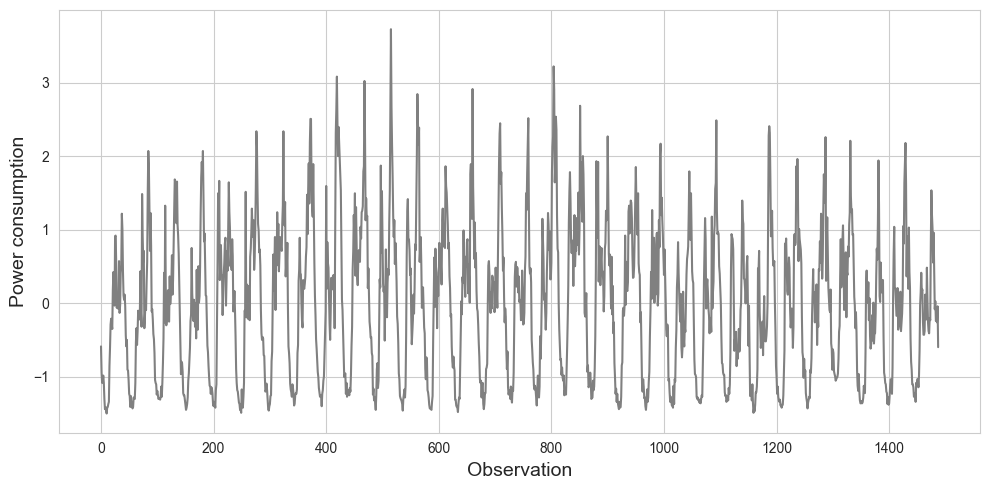

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(data[0], color='gray')
ax.set_xlabel('Observation', fontsize=14)
ax.set_ylabel('Power consumption', fontsize=14)
plt.tight_layout()

In [20]:
train_length = round(len(data) * 0.8)
train_data = torch.tensor(data[:train_length], dtype=torch.float32)
test_data = torch.tensor(data[train_length:], dtype=torch.float32)
all_data = torch.tensor(data, dtype=torch.float32)
train_loader = DataLoader(TensorDataset(train_data), batch_size=16, shuffle=True)
test_loader = DataLoader(TensorDataset(test_data), batch_size=16, shuffle=False)
all_loader = DataLoader(TensorDataset(all_data), batch_size=16, shuffle=True)

In [21]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [22]:
# Создание модели
model = Autoencoder(input_dim=1488, encoding_dim=48).to(device)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

In [23]:
k = 0
for param in model.parameters():
    if param.requires_grad:
        k += torch.prod(torch.tensor(param.size()))
print(f'Model has {k} trainable parameters')

Model has 1669888 trainable parameters


In [24]:
all_train_losses = []
train_losses = []
test_losses = []

In [25]:
epochs = 30

for epoch in range(epochs):
    avg_loss = 0
    model.train()
    for batch in train_loader:
        
        batch = batch[0].to(device)
        preds = model(batch)
        loss = criterion(preds, batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        all_train_losses.append(loss.item())
        avg_loss += loss.item()
    avg_loss /= len(train_loader)
    print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}')
    train_losses.append(avg_loss)
    
    model.eval()
    avg_test_loss = 0
    with torch.no_grad():
        for batch in test_loader:
            batch = batch[0].to(device)
            preds = model(batch)
            loss = criterion(preds, batch)
            
            avg_test_loss += loss.item()
    avg_test_loss /= len(test_loader)
    test_losses.append(avg_test_loss)
    print(f'Test Loss: {avg_test_loss:.4f}')

Epoch 1, Loss: 0.5562
Test Loss: 0.4479
Epoch 2, Loss: 0.4381
Test Loss: 0.4201
Epoch 3, Loss: 0.4127
Test Loss: 0.4062
Epoch 4, Loss: 0.4016
Test Loss: 0.3964
Epoch 5, Loss: 0.3932
Test Loss: 0.3875
Epoch 6, Loss: 0.3830
Test Loss: 0.3792
Epoch 7, Loss: 0.3761
Test Loss: 0.3743
Epoch 8, Loss: 0.3663
Test Loss: 0.3699
Epoch 9, Loss: 0.3622
Test Loss: 0.3666
Epoch 10, Loss: 0.3563
Test Loss: 0.3645
Epoch 11, Loss: 0.3505
Test Loss: 0.3623
Epoch 12, Loss: 0.3464
Test Loss: 0.3602
Epoch 13, Loss: 0.3431
Test Loss: 0.3604
Epoch 14, Loss: 0.3385
Test Loss: 0.3573
Epoch 15, Loss: 0.3336
Test Loss: 0.3574
Epoch 16, Loss: 0.3301
Test Loss: 0.3544
Epoch 17, Loss: 0.3255
Test Loss: 0.3537
Epoch 18, Loss: 0.3209
Test Loss: 0.3548
Epoch 19, Loss: 0.3182
Test Loss: 0.3530
Epoch 20, Loss: 0.3142
Test Loss: 0.3527
Epoch 21, Loss: 0.3106
Test Loss: 0.3532
Epoch 22, Loss: 0.3076
Test Loss: 0.3522
Epoch 23, Loss: 0.3054
Test Loss: 0.3542
Epoch 24, Loss: 0.3009
Test Loss: 0.3530
Epoch 25, Loss: 0.2969
Te

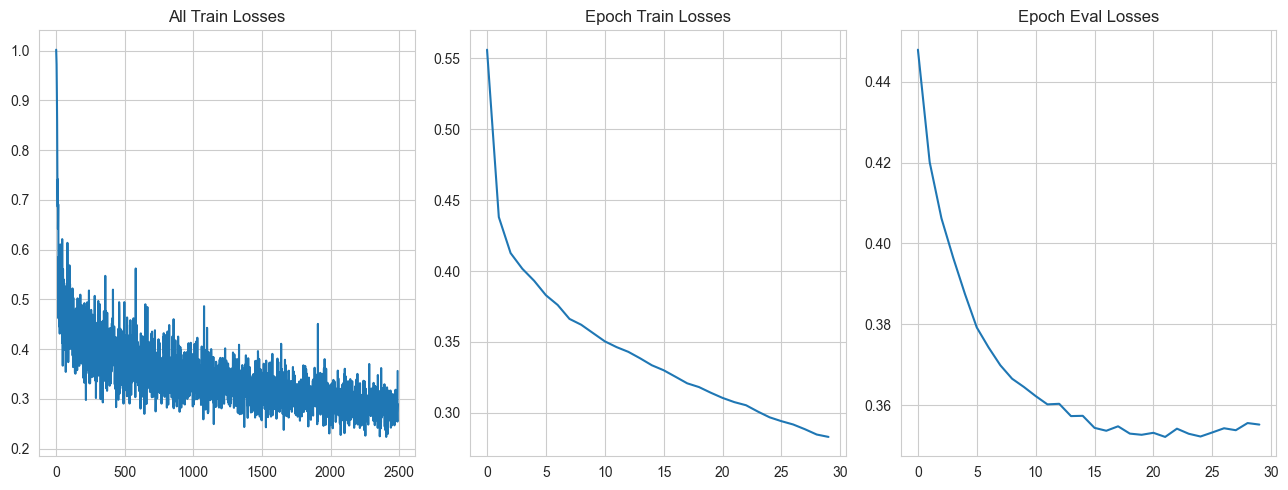

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
axes[0].plot(all_train_losses)
axes[0].set_title('All Train Losses')
axes[1].plot(train_losses)
axes[1].set_title('Epoch Train Losses')
axes[2].plot(test_losses)
axes[2].set_title('Epoch Eval Losses')
plt.tight_layout()
plt.show()

In [27]:
# Создание модели
model = Autoencoder(input_dim=1488, encoding_dim=48).to(device)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

In [28]:
k = 0
for param in model.parameters():
    if param.requires_grad:
        k += torch.prod(torch.tensor(param.size()))
print(f'Model has {k} trainable parameters')

Model has 1669888 trainable parameters


In [29]:
epochs = 23

for epoch in range(epochs):
    avg_loss = 0
    model.train()
    for batch in all_loader:
        
        batch = batch[0].to(device)
        preds = model(batch)
        loss = criterion(preds, batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss += loss.item()
    avg_loss /= len(train_loader)
    print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}')

Epoch 1, Loss: 0.6588
Epoch 2, Loss: 0.5275
Epoch 3, Loss: 0.5020
Epoch 4, Loss: 0.4841
Epoch 5, Loss: 0.4713
Epoch 6, Loss: 0.4615
Epoch 7, Loss: 0.4516
Epoch 8, Loss: 0.4449
Epoch 9, Loss: 0.4380
Epoch 10, Loss: 0.4317
Epoch 11, Loss: 0.4258
Epoch 12, Loss: 0.4198
Epoch 13, Loss: 0.4148
Epoch 14, Loss: 0.4094
Epoch 15, Loss: 0.4036
Epoch 16, Loss: 0.3988
Epoch 17, Loss: 0.3938
Epoch 18, Loss: 0.3889
Epoch 19, Loss: 0.3847
Epoch 20, Loss: 0.3808
Epoch 21, Loss: 0.3772
Epoch 22, Loss: 0.3745
Epoch 23, Loss: 0.3703


In [30]:
errors = []
encoded = []
reconstructed = []
with torch.no_grad():
    for sample in all_data:
        inputs = sample.view(1, 1, -1).to(device)
        res = model(inputs).cpu().detach().flatten()
        reconstruction_error = criterion(res, sample)
        errors.append(reconstruction_error.numpy())

        features = model.encoder(inputs).view(-1)
        encoded.append(features.cpu().detach().numpy())

        reconstructed.append(res.view(-1).cpu().detach().numpy())

errors = np.array(errors)
encoded = np.array(encoded)
reconstructed = np.array(reconstructed)

In [31]:
def plot_sample(sample):
    _, ax = plt.subplots(figsize=(20, 5))
    ax.plot(data[sample], label='True Row')
    pred_row = reconstructed[sample]
    ax.plot(pred_row, label='Predicted Row')
    mse = np.linalg.norm(data[sample] - pred_row) ** 2 / len(data[sample])
    ax.set_title(f'Model Prediction VS True Row, MSE: {mse.round(2)}, Sample: {sample}')
    plt.legend()
    plt.show()

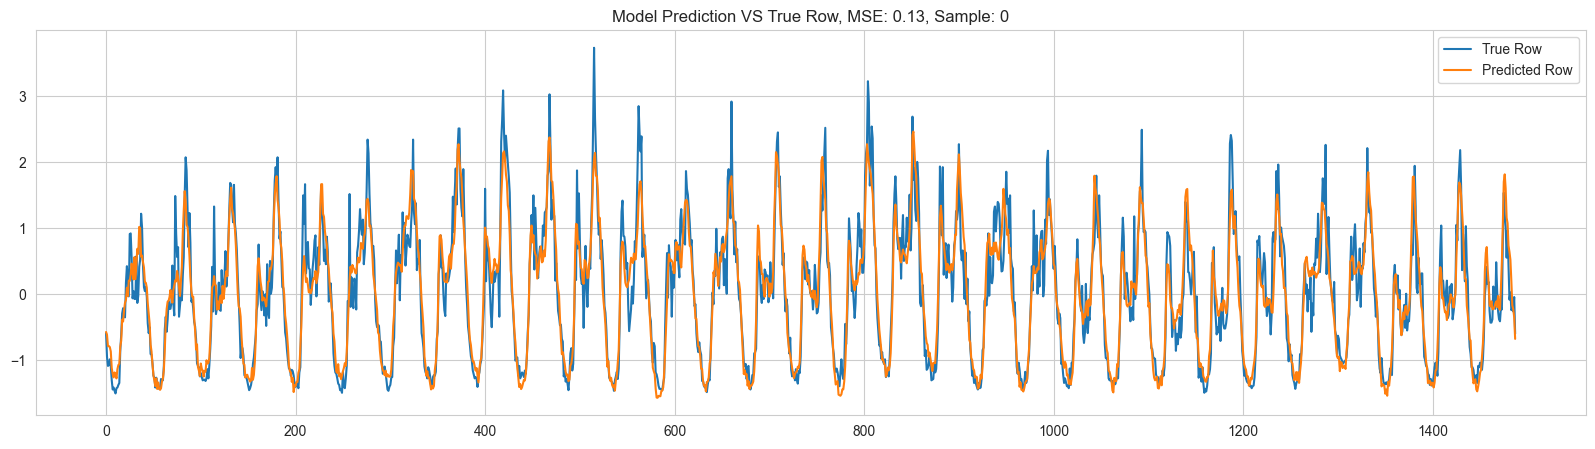

In [32]:
plot_sample(0)

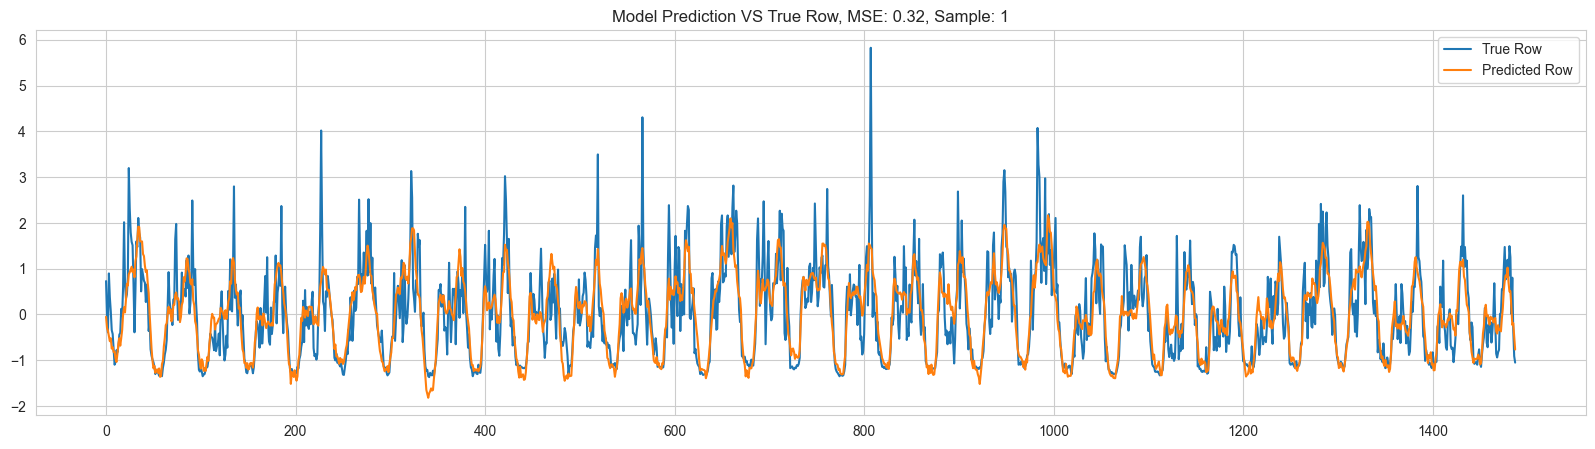

In [38]:
plot_sample(1)

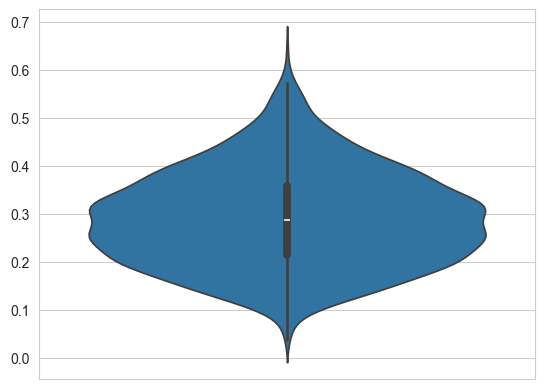

In [39]:
sns.violinplot(errors)
plt.show()

In [40]:
np.quantile(errors, 0.99)

0.544687329530716

In [41]:
np.column_stack((np.argsort(-errors), -np.sort(-errors)))

array([[1.57800000e+03, 6.45303071e-01],
       [1.42000000e+02, 6.05038643e-01],
       [5.84000000e+02, 5.93445361e-01],
       ...,
       [1.10200000e+03, 5.73880859e-02],
       [6.54000000e+02, 4.34228331e-02],
       [2.23000000e+02, 3.66923735e-02]])

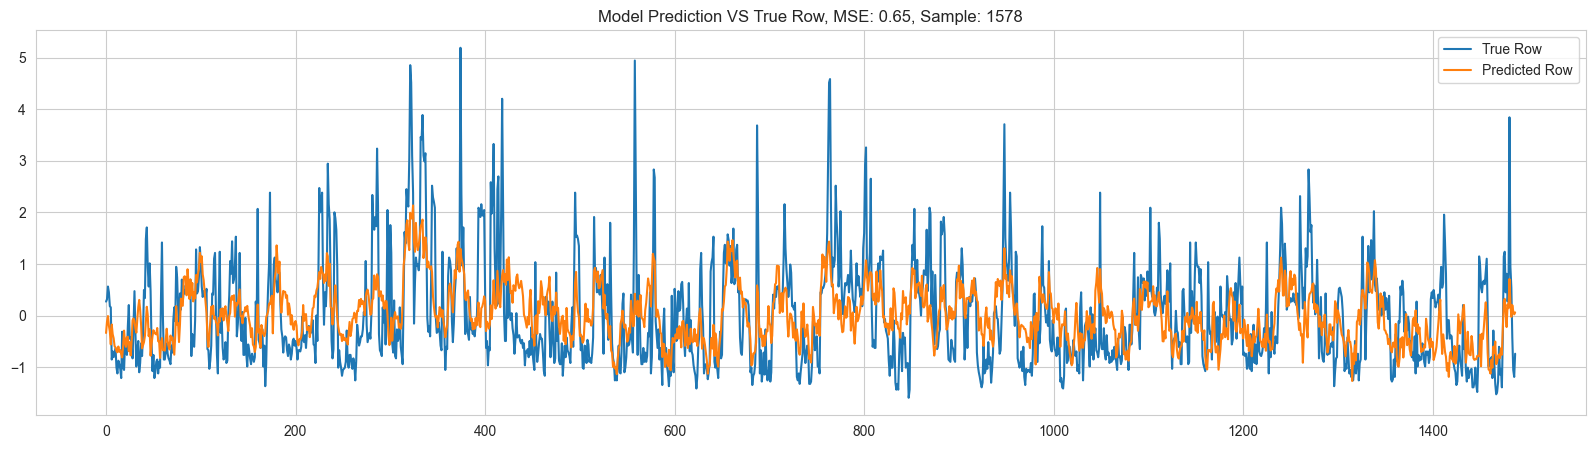

In [43]:
plot_sample(1578)

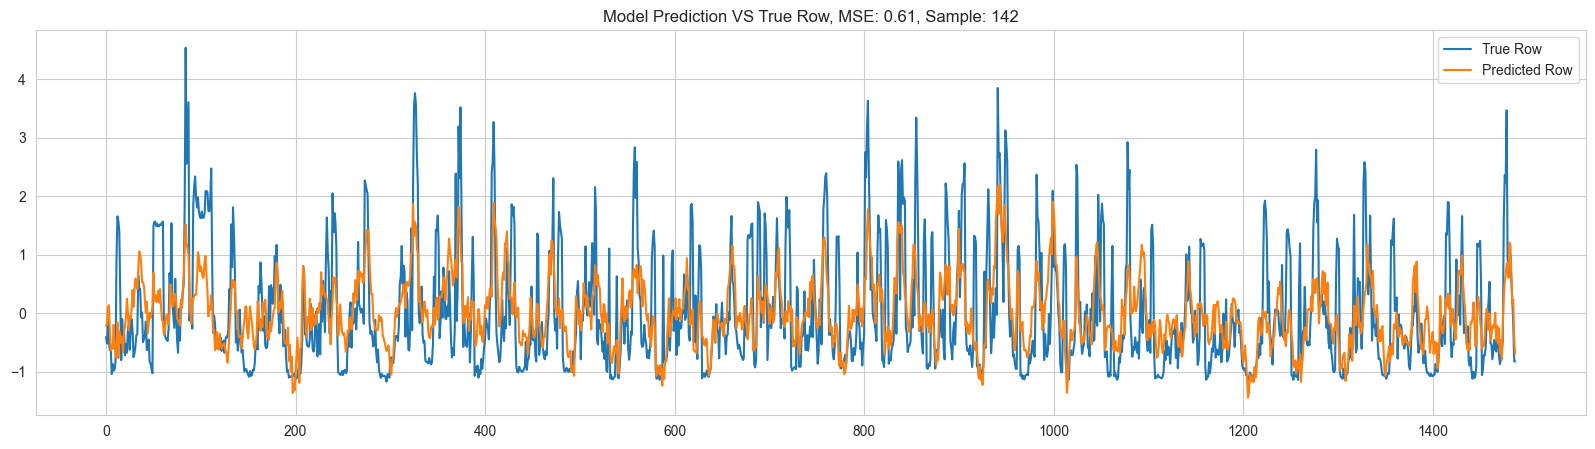

In [44]:
plot_sample(142)

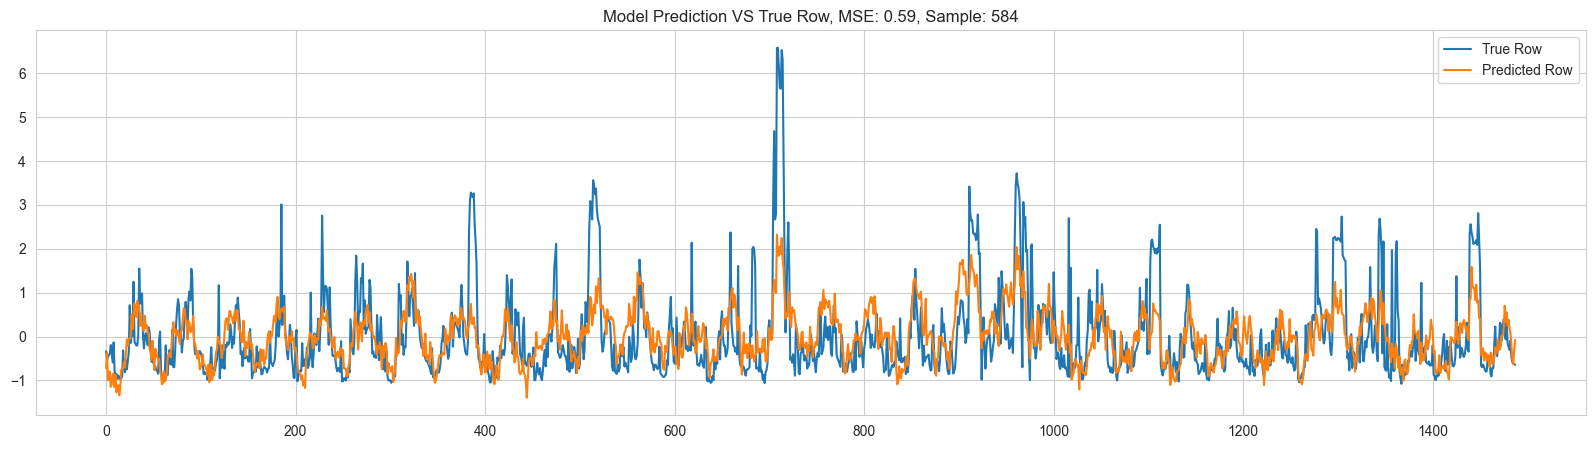

In [45]:
plot_sample(584)

In [46]:
encoded_norm = (encoded - encoded.mean(axis=0)) / encoded.std(axis=0)

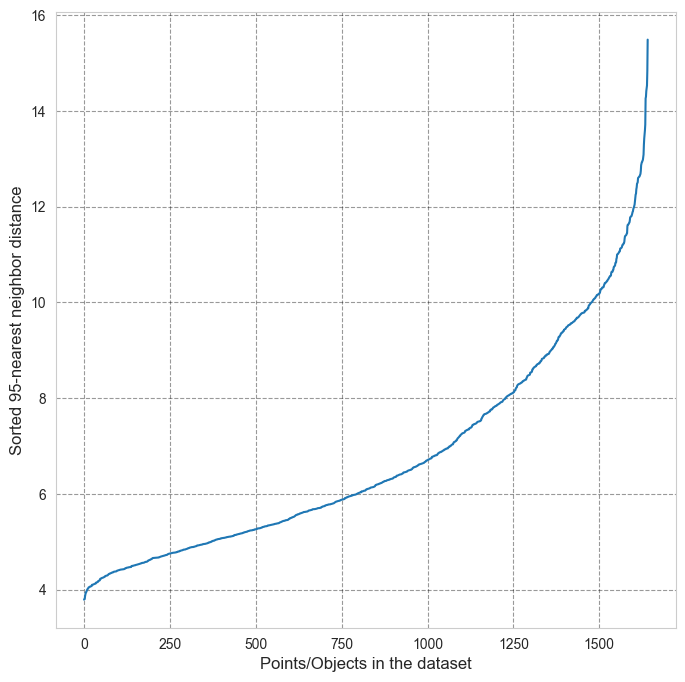

In [47]:
from sklearn.neighbors import NearestNeighbors


def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X)

    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * encoded_norm.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=encoded_norm, k=k)

In [66]:
from sklearn.cluster import DBSCAN

# Создаем объект DBSCAN
dbscan = DBSCAN(eps=11.88, min_samples=10)

# Проводим кластеризацию данных
clusters = dbscan.fit_predict(encoded_norm)

# Ищем объекты, отнесенные к кластеру -1 (это аномалии)
anomalies_indices = np.where(clusters == -1)[0]
anomalies_indices

array([ 393, 1119, 1443], dtype=int64)

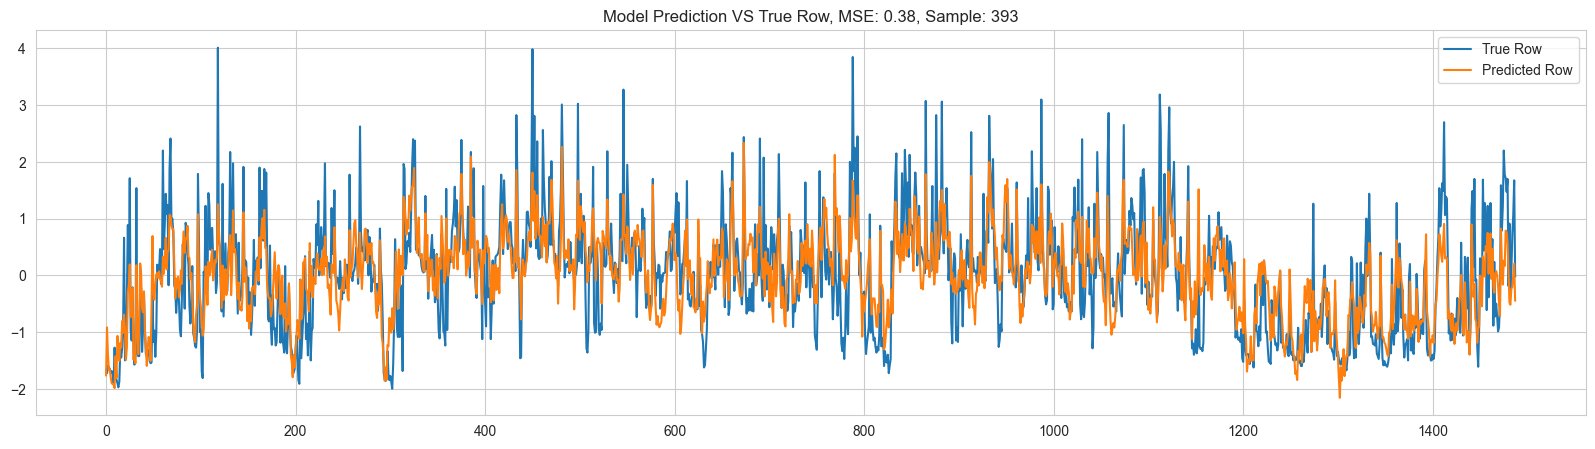

In [67]:
plot_sample(393)

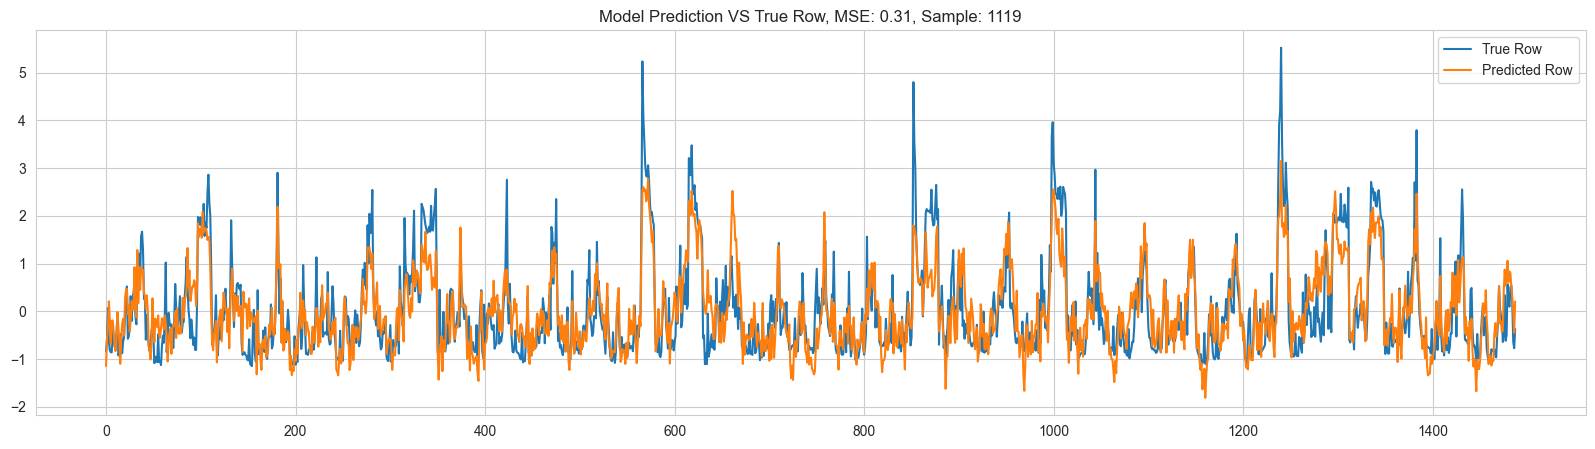

In [68]:
plot_sample(1119)

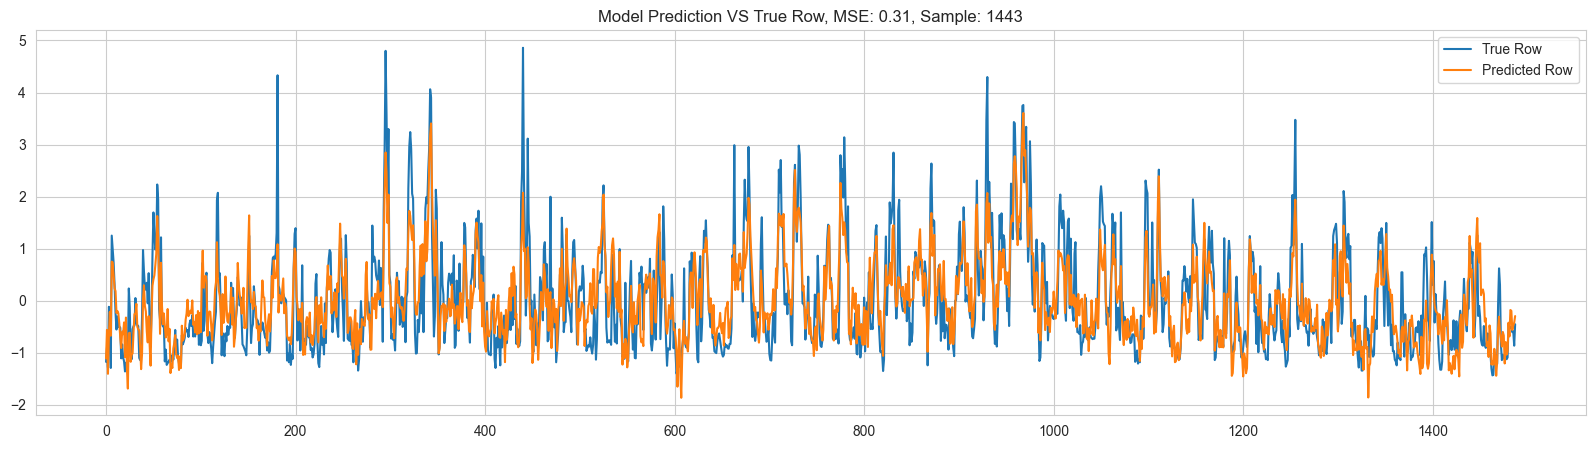

In [69]:
plot_sample(1443)